In [1]:
import Runner
import Maze
import Robot
import random
import numpy as np
import importlib
import os
import imageio

importlib.reload(Robot)
importlib.reload(Runner)
importlib.reload(Maze)

<module 'Maze' from 'D:\\python\\udacity-ml\\RL\\qlearning_maze\\Maze.py'>

In [2]:
times_file = 'test_times.txt'
def get_test_times():
    test_times = 0
    if os.path.isfile(times_file):
        f = open(times_file, 'r')
        a = f.read()
        test_times = int(a)
        f.close()
    else:
        f = open(times_file, 'w')
        f.write(str(test_times))
        f.close()
    return test_times

def set_test_times(times):
    f = open(times_file, 'w')
    f.write(str(test_times))
    f.close()

In [5]:
## 可选的参数：
epoch = 400
times_per_epoch = 1000

epsilon0 = 0.9
alpha = 0.1
gamma = 0.9

maze_size = (20,20)
trap_number = 5

test_times = get_test_times()

generate: ./result/400_1000_0.9_0.1_0.9_300
generate: ./result/400_1000_0.9_0.1_0.9_301
generate: ./result/400_1000_0.9_0.1_0.9_302
generate: ./result/400_1000_0.9_0.1_0.9_303
generate: ./result/400_1000_0.9_0.1_0.9_304
generate: ./result/400_1000_0.9_0.1_0.9_305
generate: ./result/400_1000_0.9_0.1_0.9_306
generate: ./result/400_1000_0.9_0.1_0.9_307
generate: ./result/400_1000_0.9_0.1_0.9_308
generate: ./result/400_1000_0.9_0.1_0.9_309
generate: ./result/400_1000_0.9_0.1_0.9_310
generate: ./result/400_1000_0.9_0.1_0.9_311
generate: ./result/400_1000_0.9_0.1_0.9_312
generate: ./result/400_1000_0.9_0.1_0.9_313
generate: ./result/400_1000_0.9_0.1_0.9_314
generate: ./result/400_1000_0.9_0.1_0.9_315
generate: ./result/400_1000_0.9_0.1_0.9_316
generate: ./result/400_1000_0.9_0.1_0.9_317
generate: ./result/400_1000_0.9_0.1_0.9_318
generate: ./result/400_1000_0.9_0.1_0.9_319
generate: ./result/400_1000_0.9_0.1_0.9_320
generate: ./result/400_1000_0.9_0.1_0.9_321
generate: ./result/400_1000_0.9_

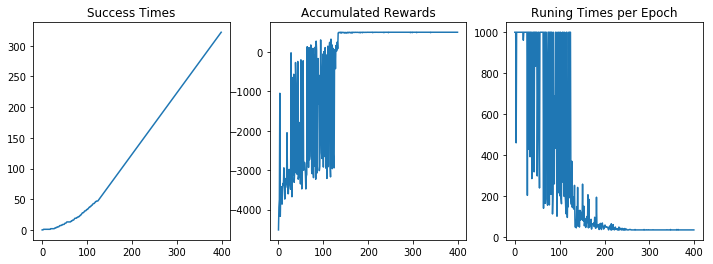

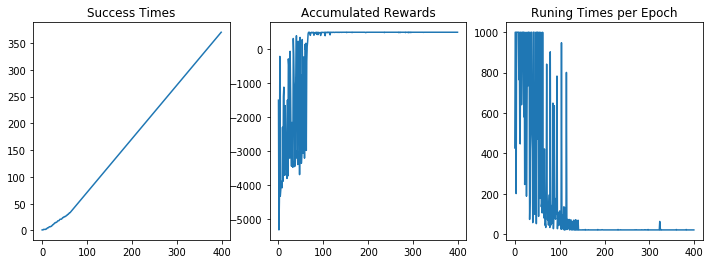

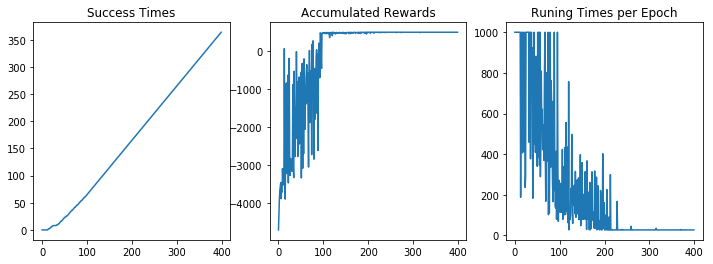

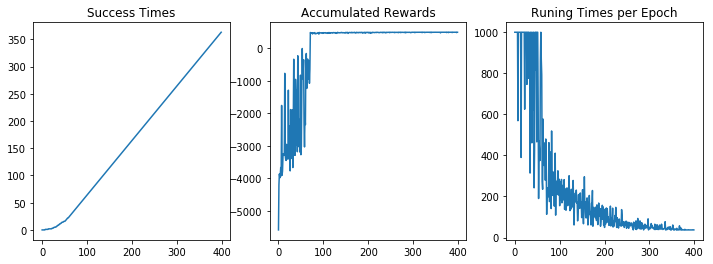

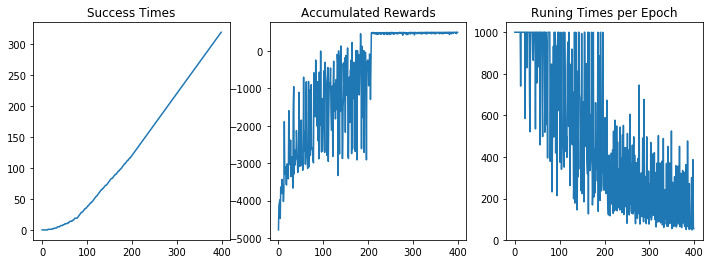

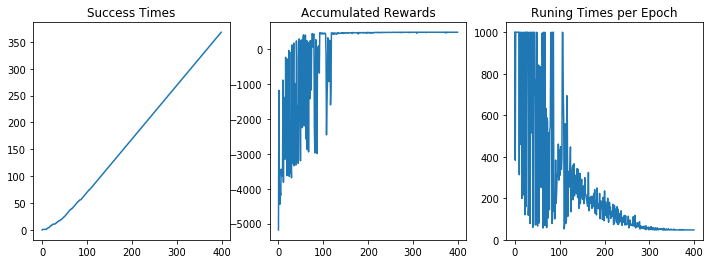

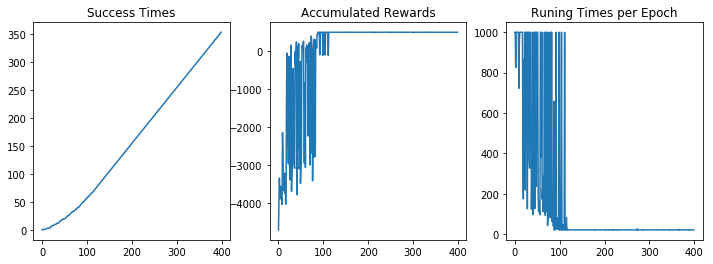

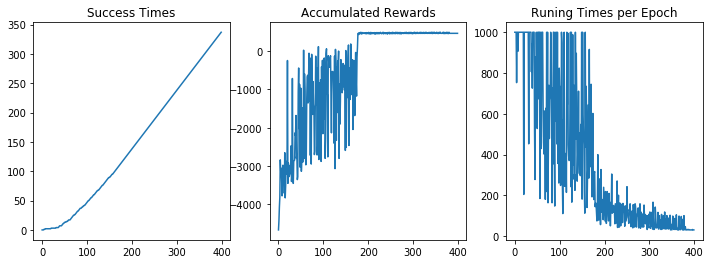

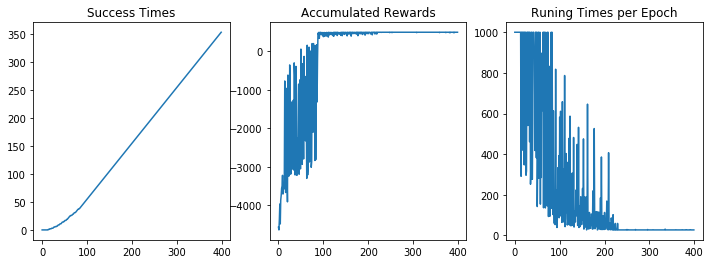

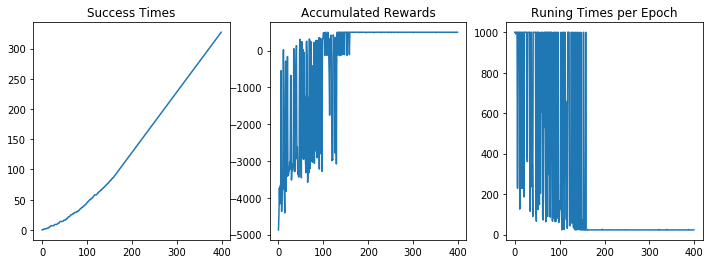

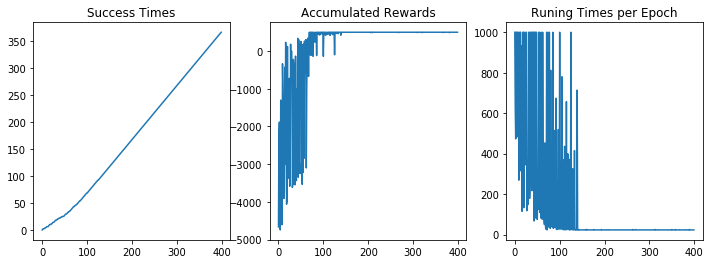

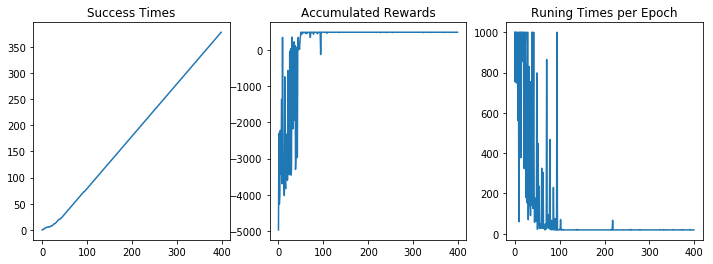

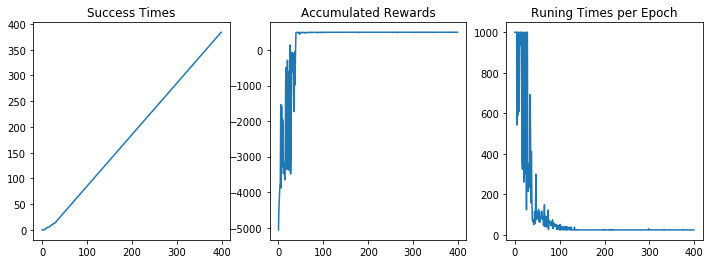

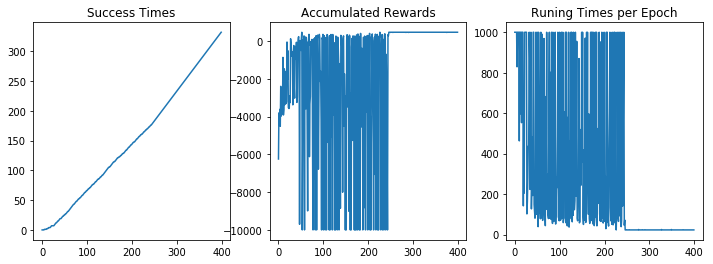

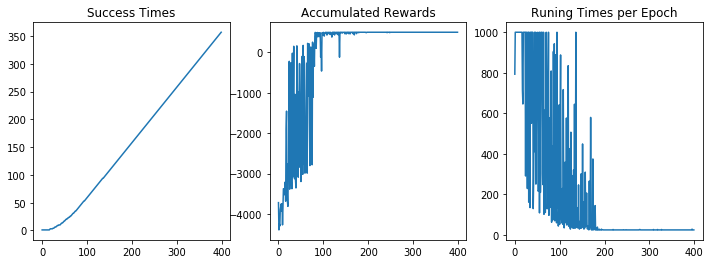

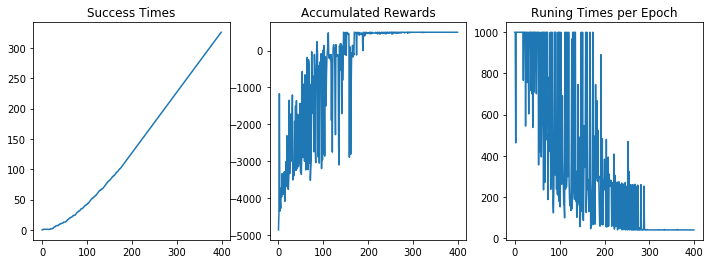

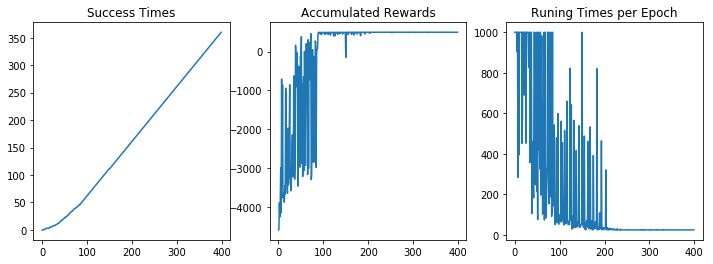

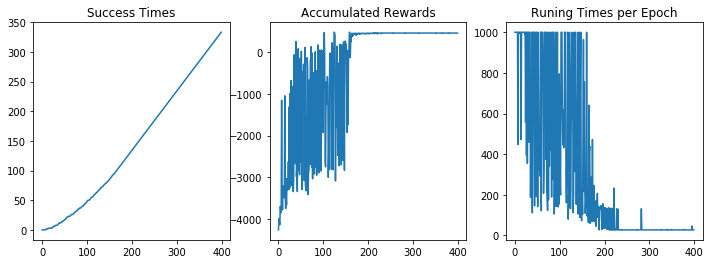

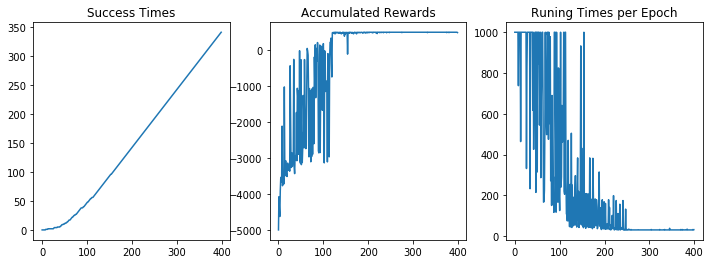

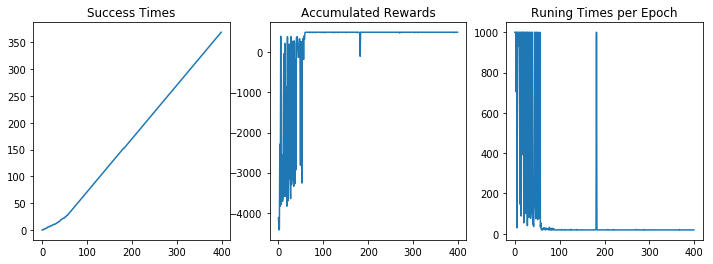

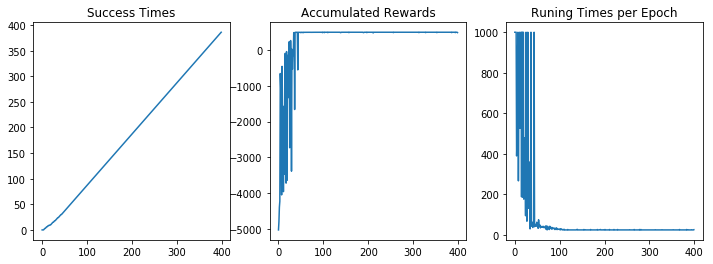

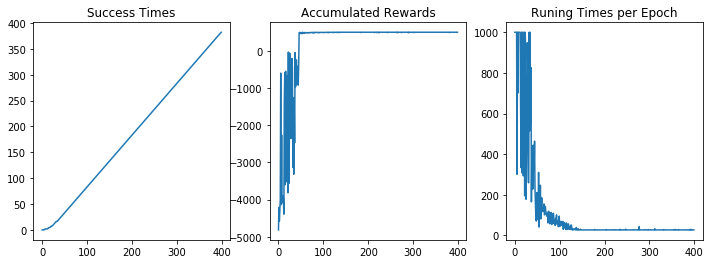

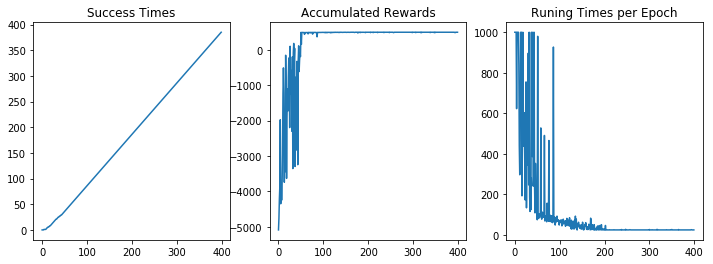

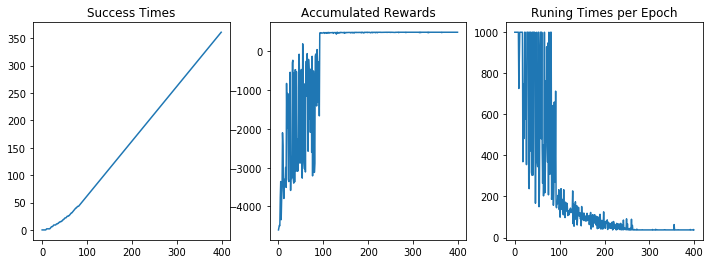

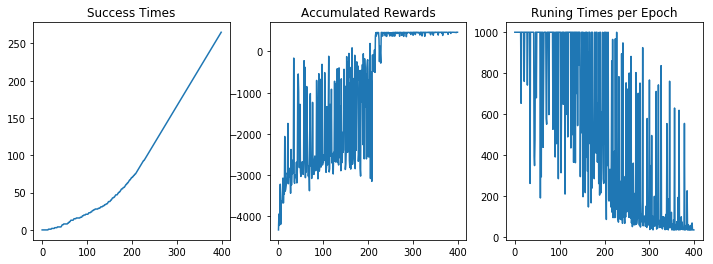

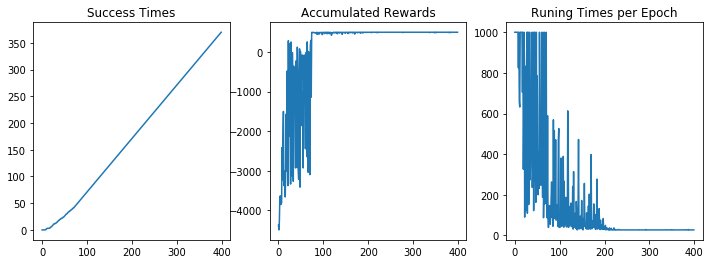

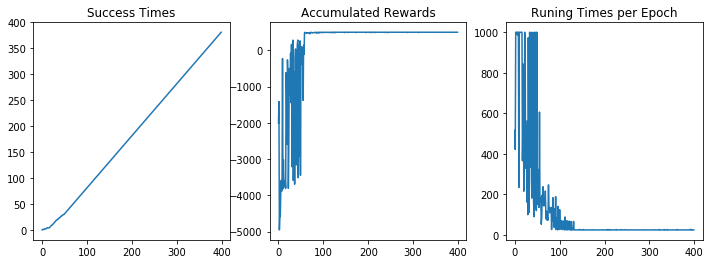

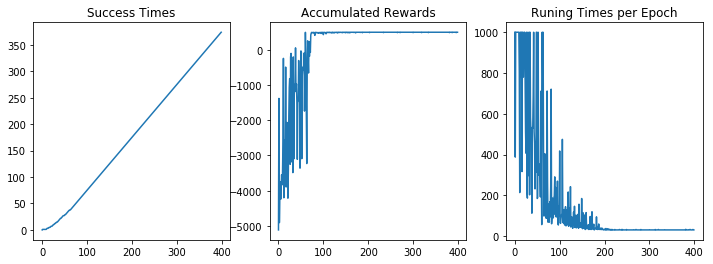

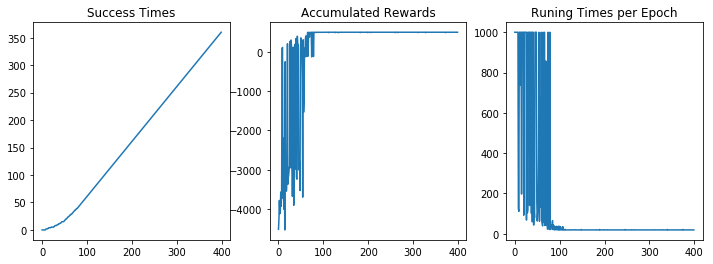

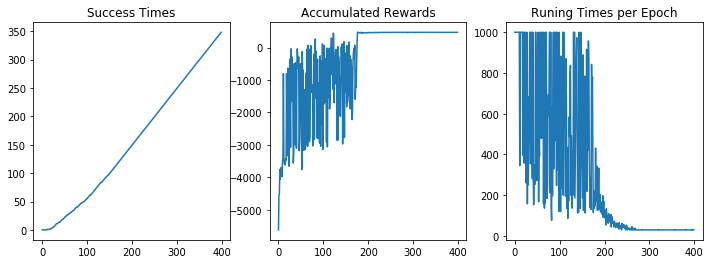

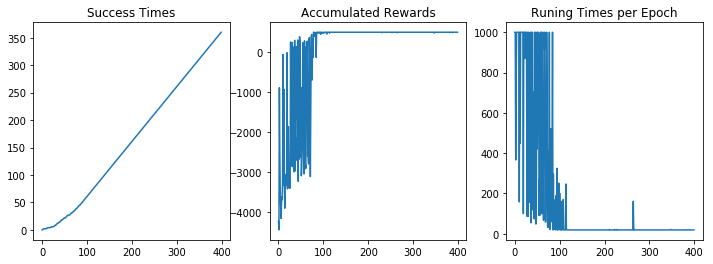

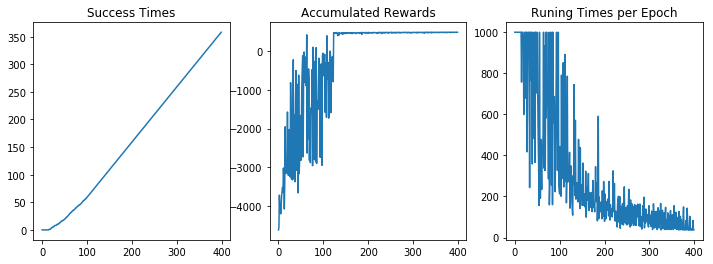

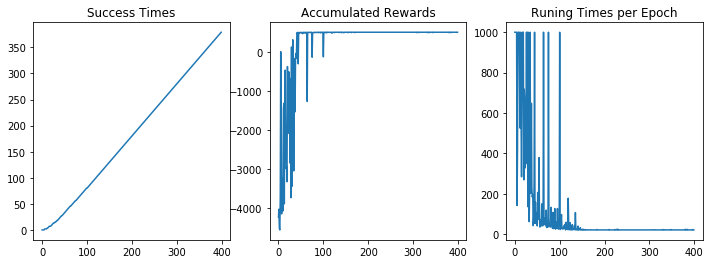

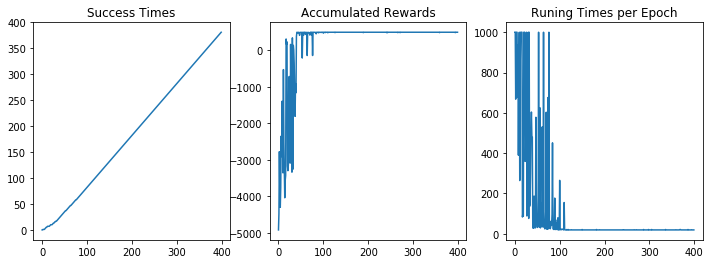

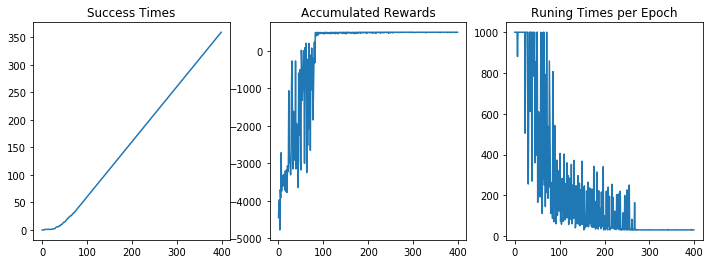

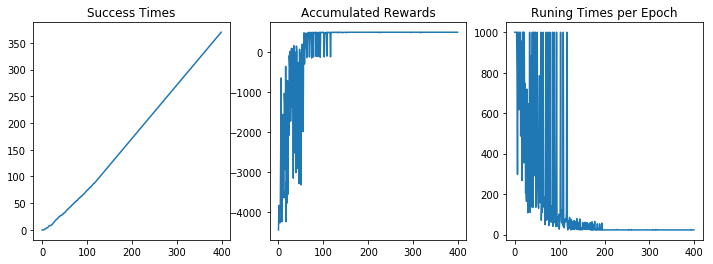

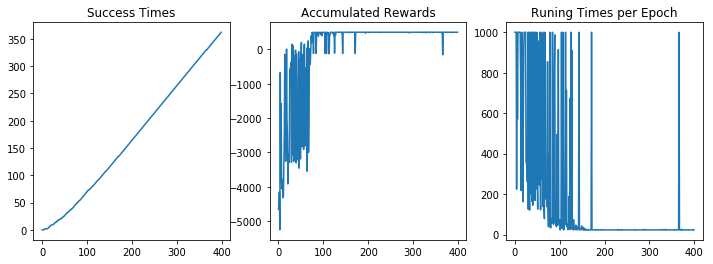

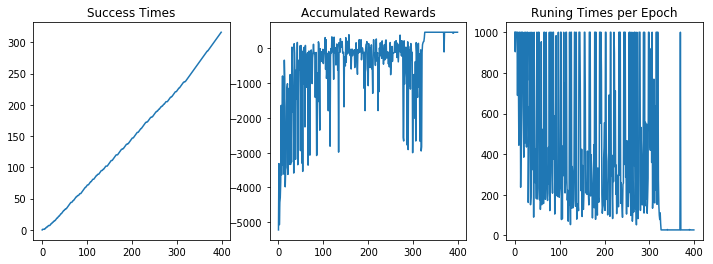

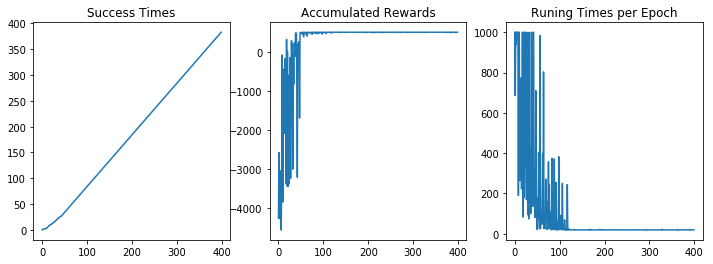

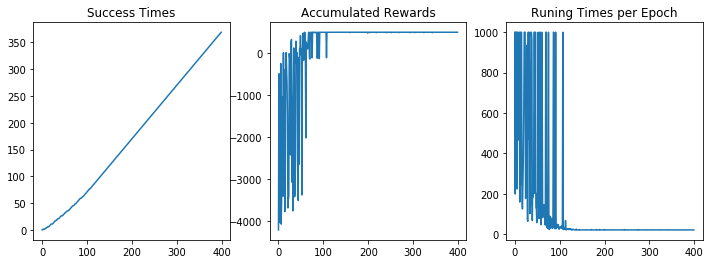

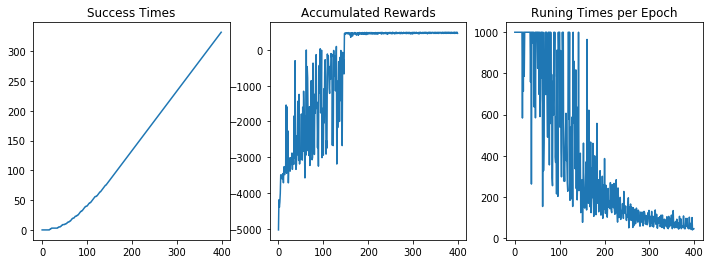

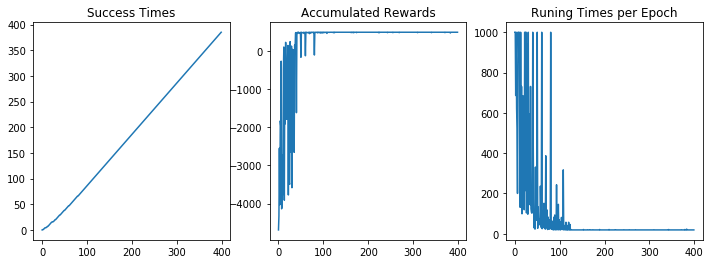

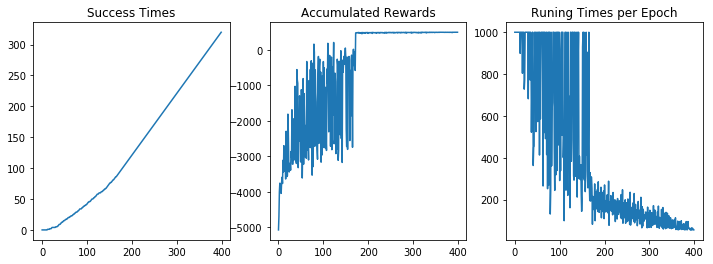

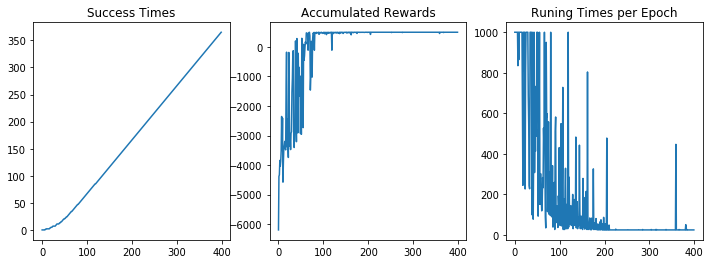

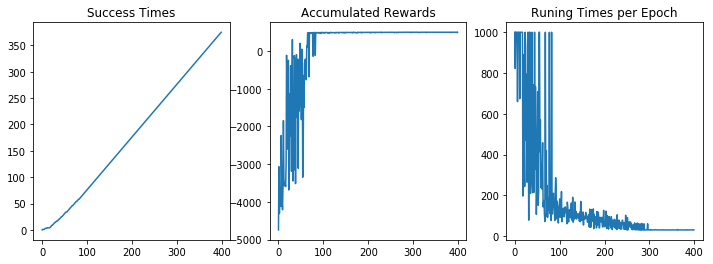

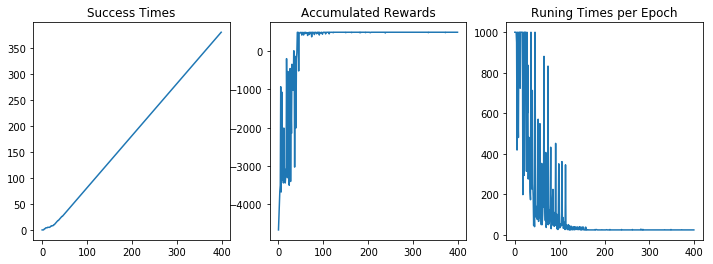

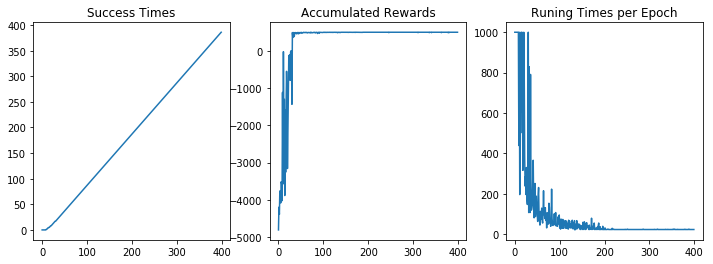

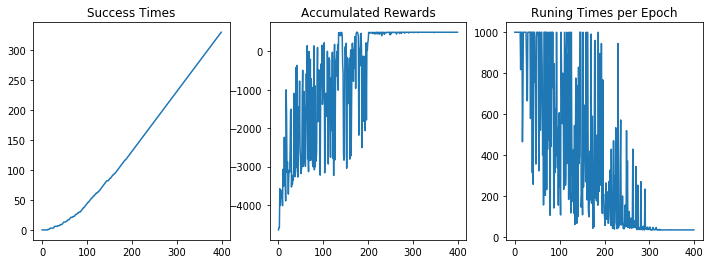

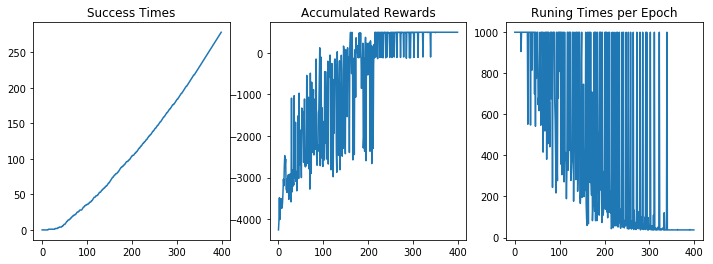

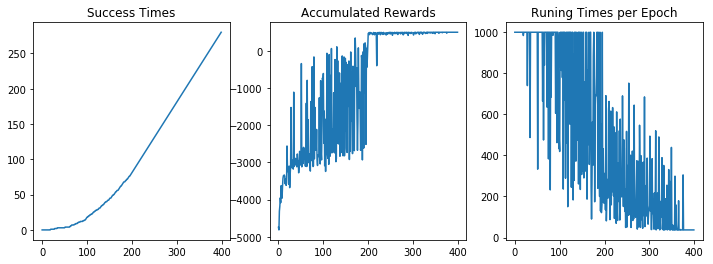

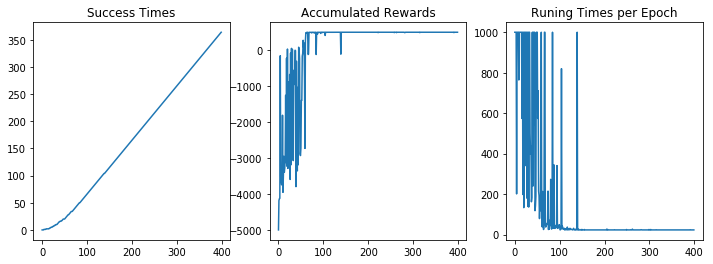

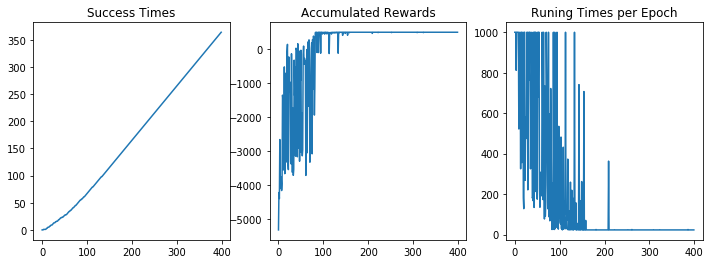

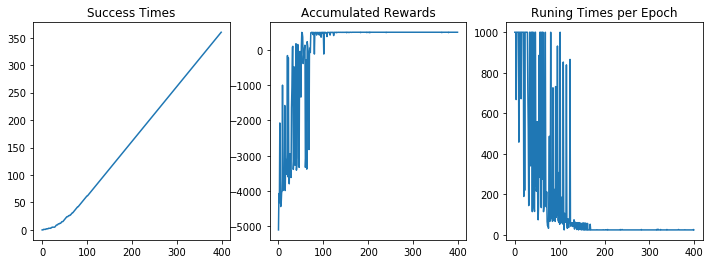

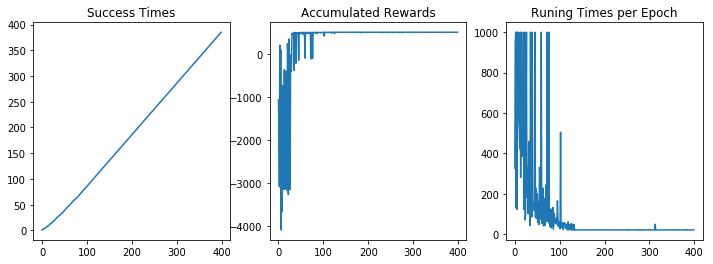

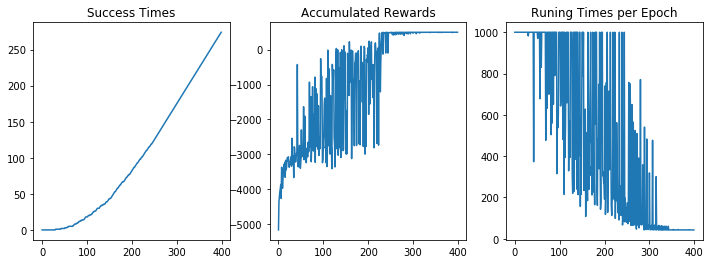

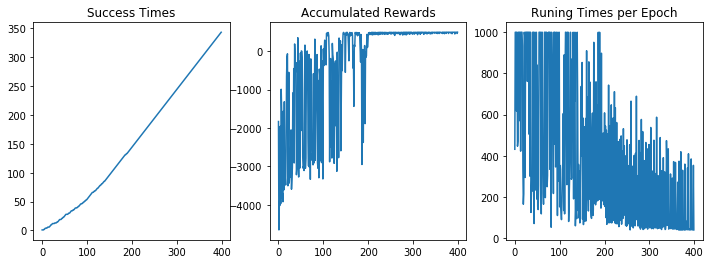

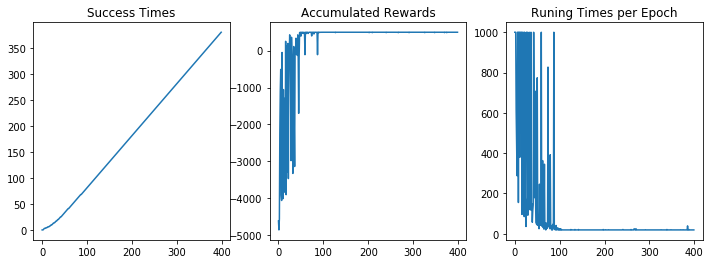

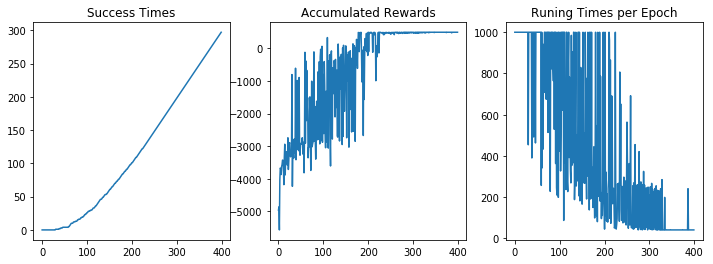

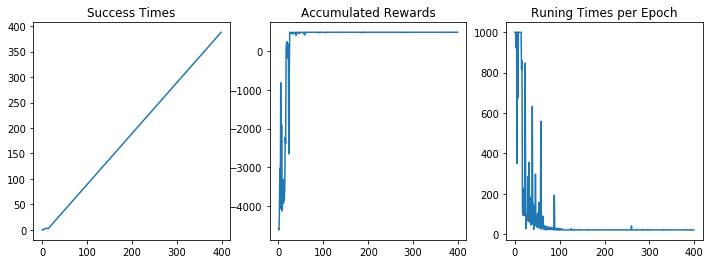

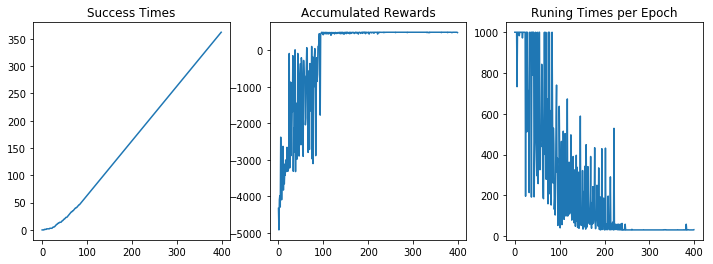

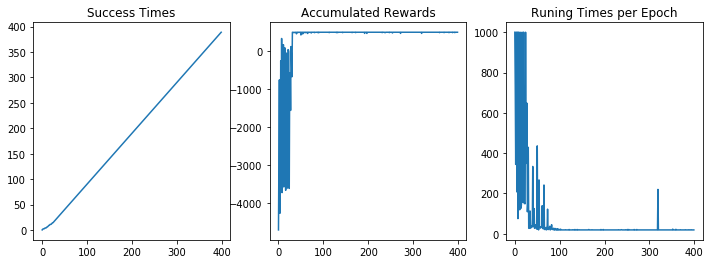

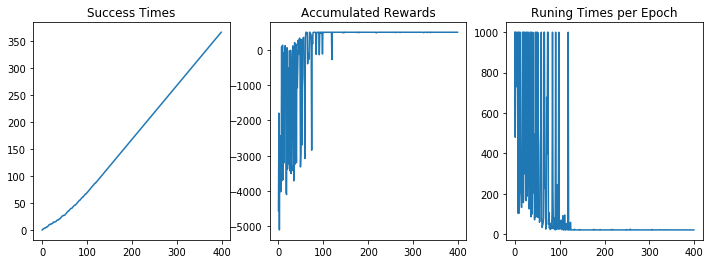

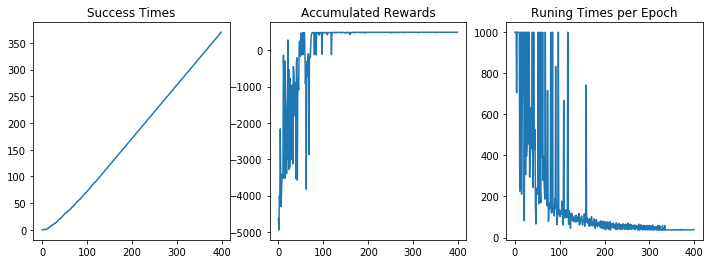

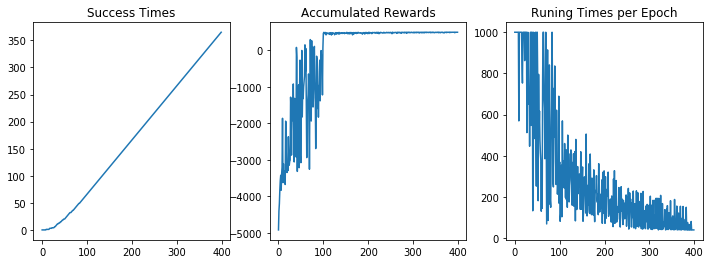

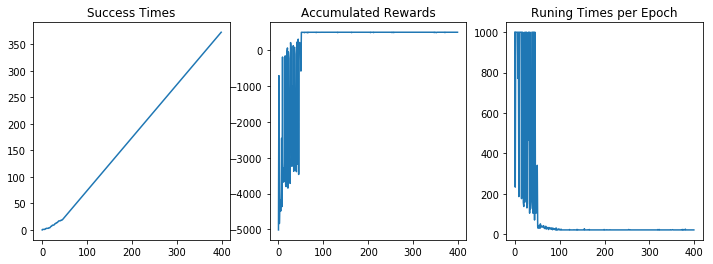

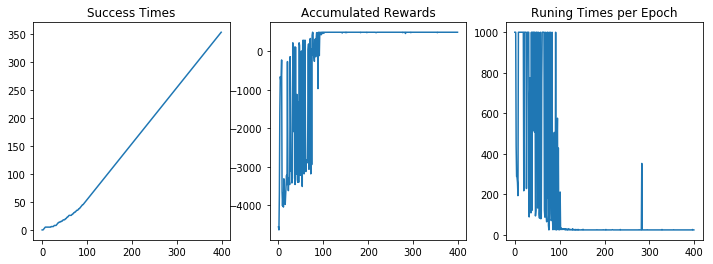

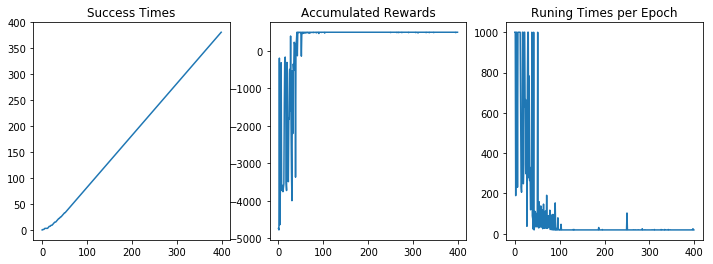

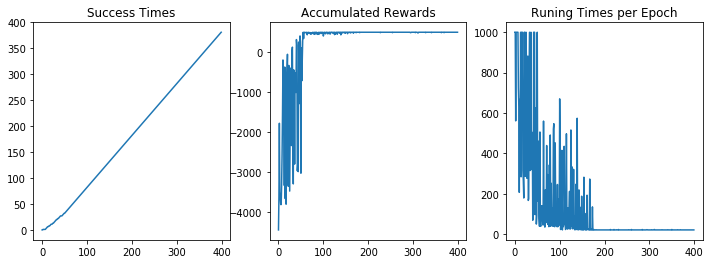

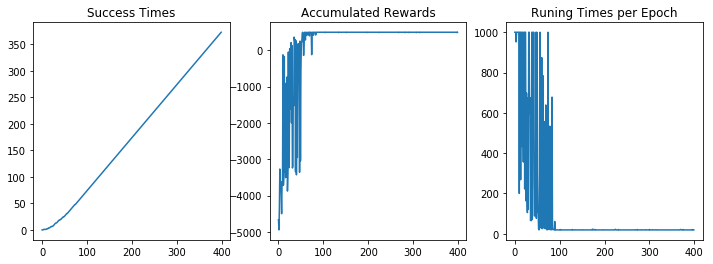

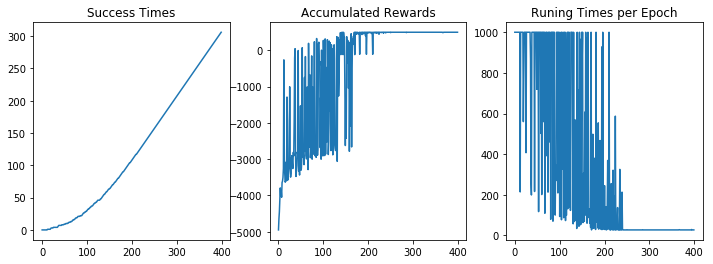

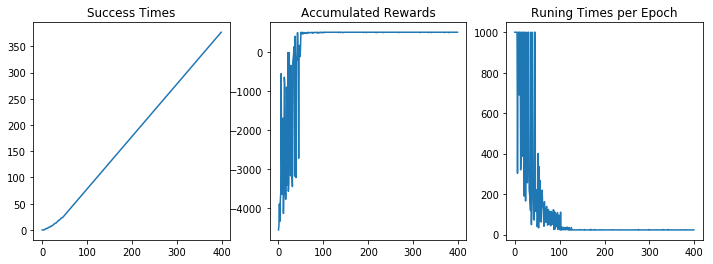

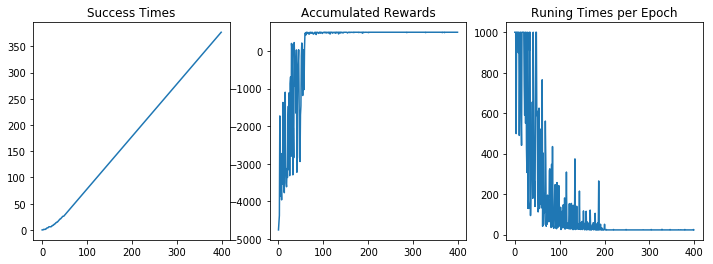

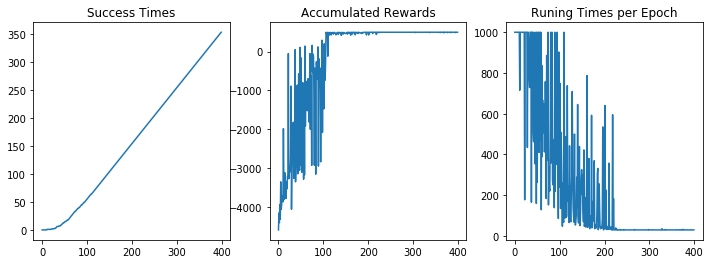

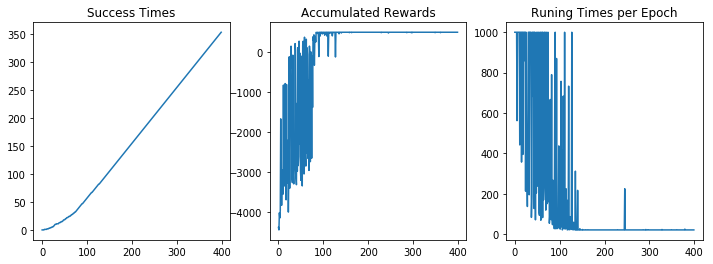

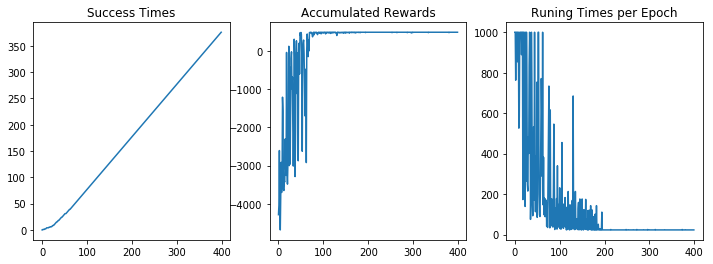

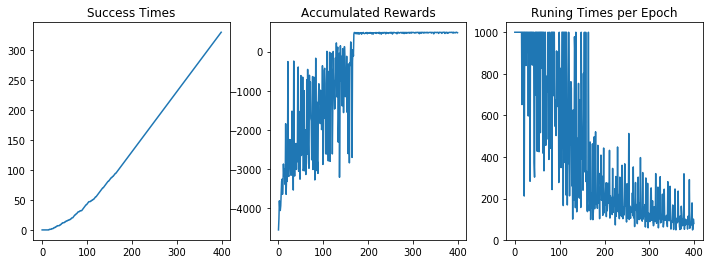

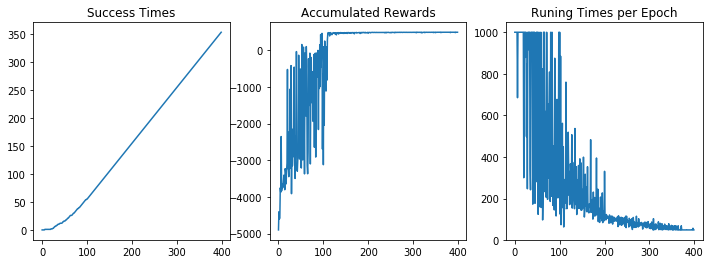

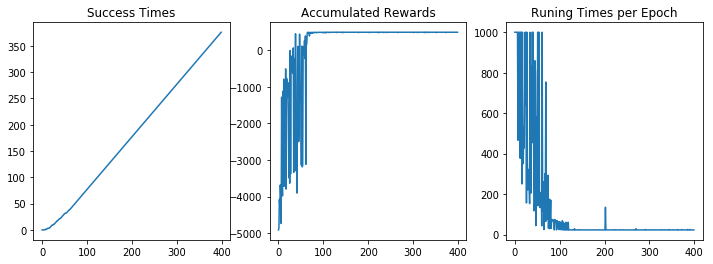

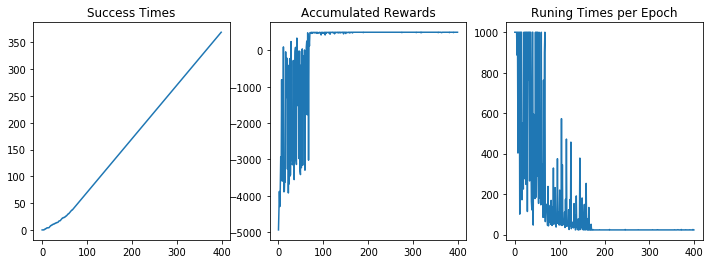

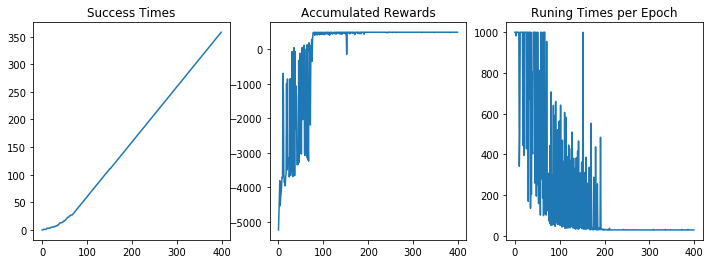

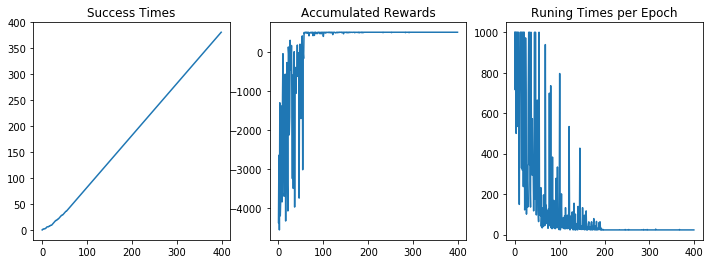

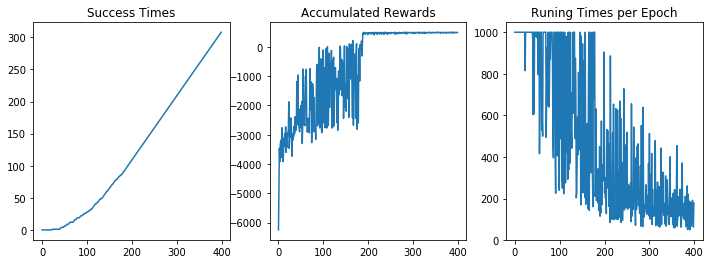

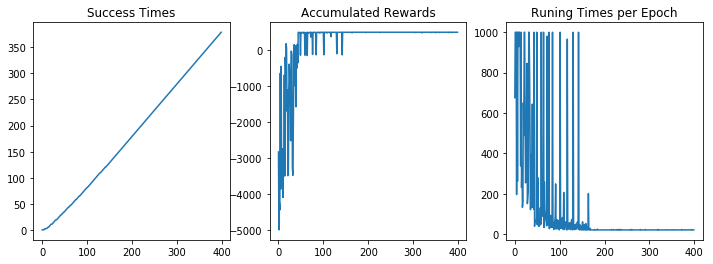

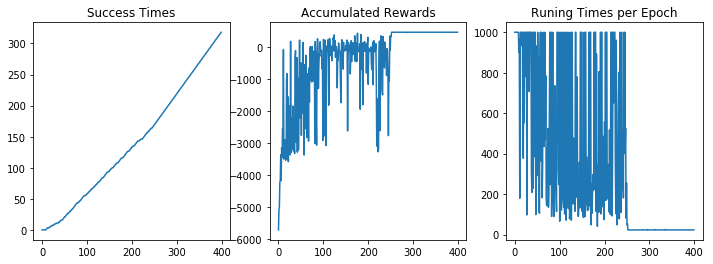

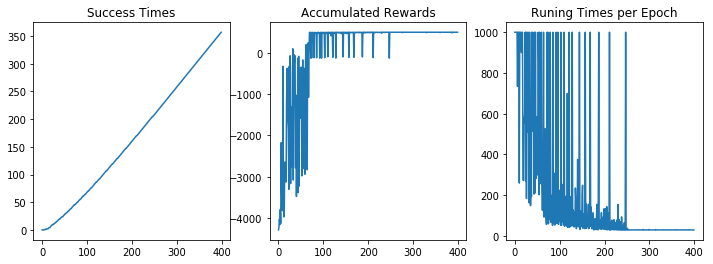

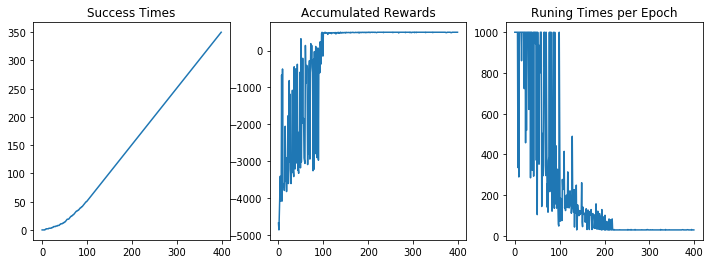

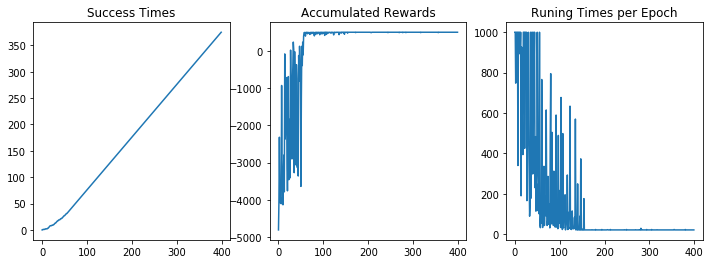

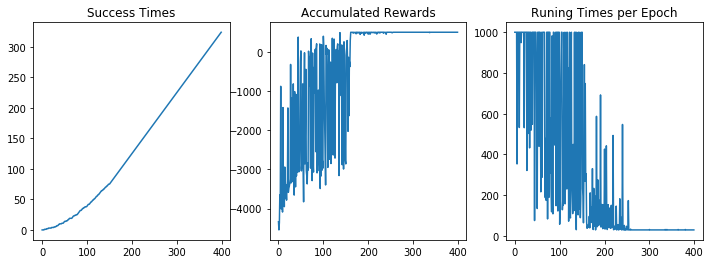

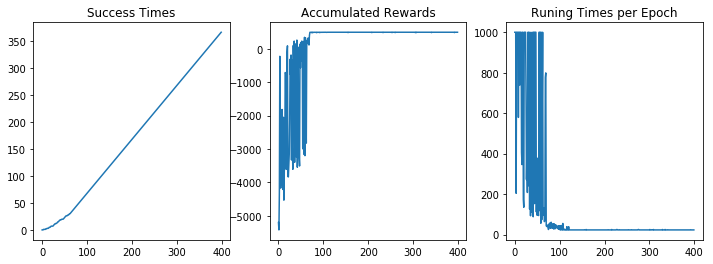

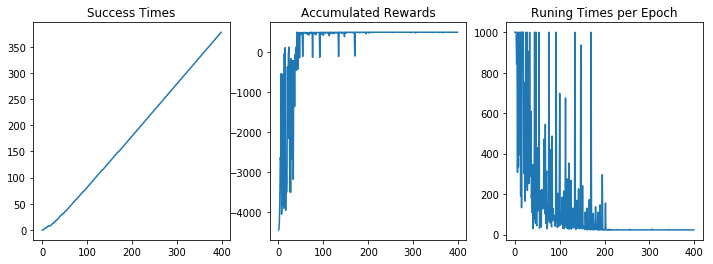

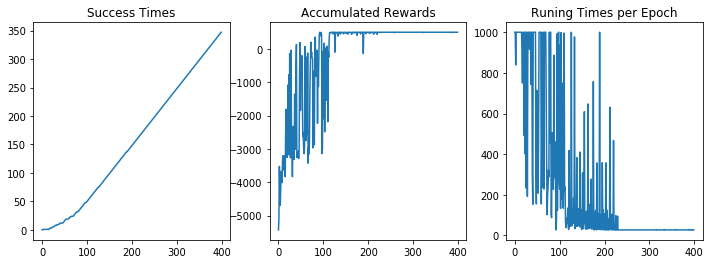

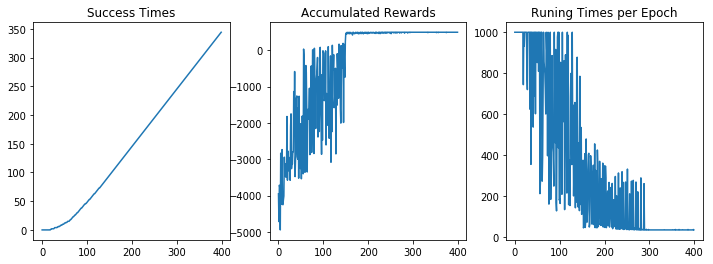

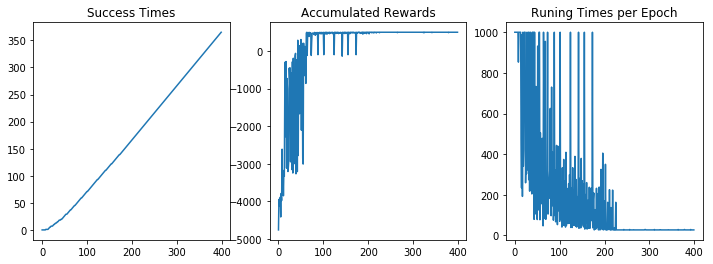

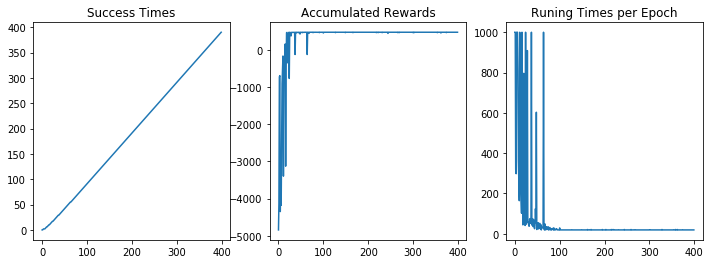

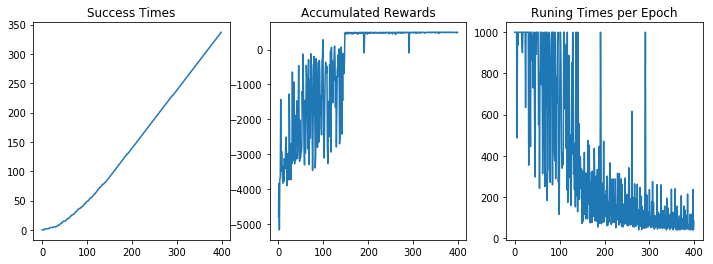

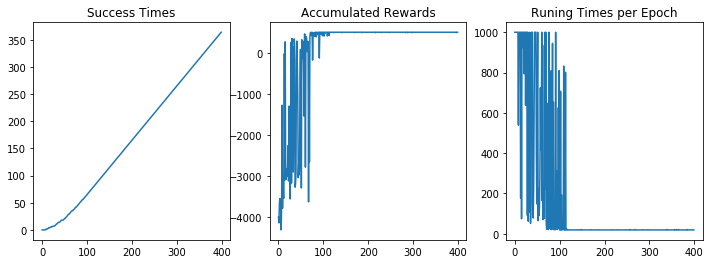

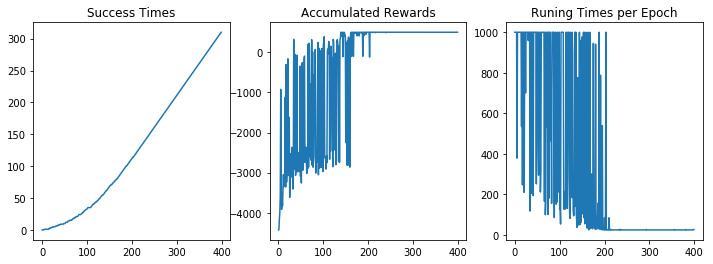

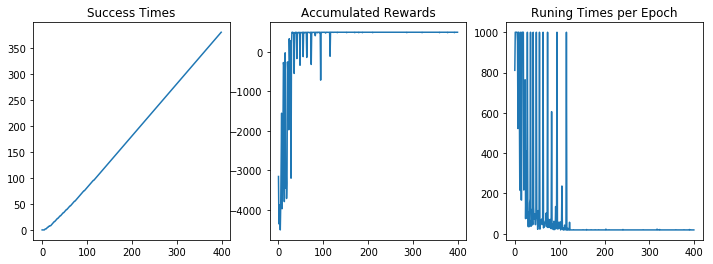

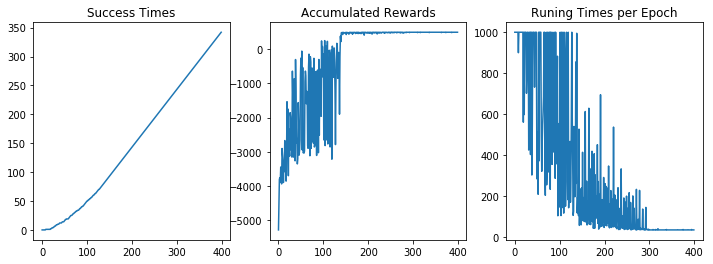

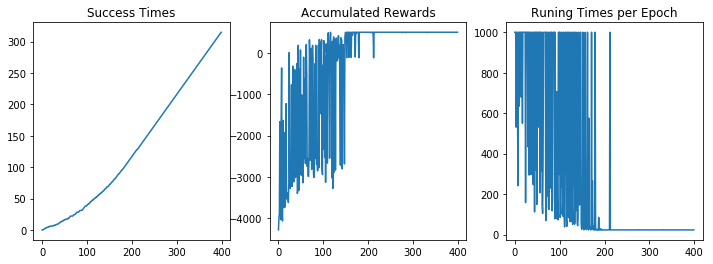

In [6]:
file_prefix = './result/{}_{}_{}_{}_{}_'.format(epoch, times_per_epoch, epsilon0, alpha, gamma)

for i in range(100):
    g = Maze.Maze(maze_size=maze_size,trap_number=trap_number)
    r = Robot.Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
    r.set_status(learning=True)

    runner = Runner.Runner(r, g)
    runner.run_training(epoch, training_per_epoch=times_per_epoch, display_direction=True)
    
    vname = '{}{}_video.mp4'.format(file_prefix, test_times)
    resultname = '{}{}_result.jpg'.format(file_prefix, test_times)
    Qtablename = '{}{}_Qtable.txt'.format(file_prefix, test_times)
    mapname = '{}{}_map.txt'.format(file_prefix, test_times)
    destname = '{}{}_dest.txt'.format(file_prefix, test_times)
    trapsname = '{}{}_traps.txt'.format(file_prefix, test_times)
    mazename = '{}{}_maze.jpg'.format(file_prefix, test_times)
    trainingname = '{}{}_training.txt'.format(file_prefix, test_times)
    
    print('generate:', file_prefix+str(test_times))
#     runner.generate_movie(filename = vname)
    imageio.imwrite(mazename, g.get_raw_maze_img())
    runner.plot_results(save_file=resultname)
    r.Qstate_to_file(Qtablename)
    g.maze_to_file(map_file=mapname, dest_file=destname, trap_file=trapsname)
    runner.info_to_file(trainingname)
#     print(g)
#     runner.plot_results()
    test_times += 1
    
set_test_times(test_times)